In [27]:
import vaex
import numpy as np
from matplotlib import pyplot as plt
from os.path import join, abspath
from os import pardir
import sys
from scipy import interpolate
from glob import glob
from scipy.stats import gaussian_kde

In [28]:
root_dir = abspath(pardir)
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/4_Vertical_Number',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [29]:
from utils import compjk, safe_mkdir

In [30]:
root_data_dir = join(root_dir, 'Data')
spectral_dir = join(root_data_dir, 'Spectral-Class-Cluster-metal')
spectral_files = glob(join(spectral_dir, '*.hdf5'))
spectral_files.sort()
spectral_files

['/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(-0.10)_(0.13).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(0.13)_(0.19).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(0.19)_(0.24).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(0.24)_(0.27).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(0.27)_(0.31).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(0.31)_(0.33).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(0.33)_(0.36).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(0.36)_(0.38).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(0.38)_(0.40).hdf5']

In [31]:
name = "Effective-Completeness-metal"
data_dir = join(root_data_dir, name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Effective-Completeness-metal already exist. Good to go!


In [32]:
coef_path = join(root_data_dir, "Completeness", "coefficients-metal.hdf5")
coef_path

'/home2/s20321005/Thesis-Project/Data/Completeness/coefficients-metal.hdf5'

# testing

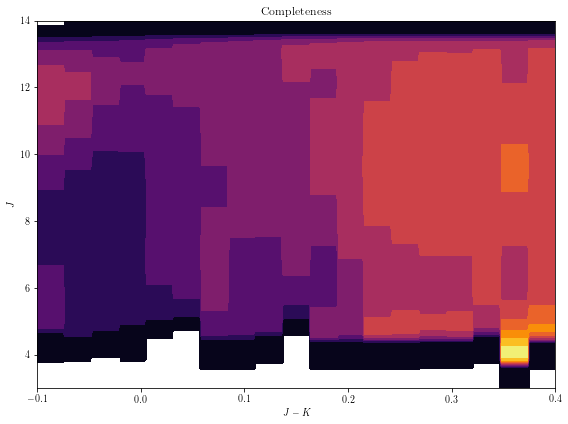

In [33]:
j = np.linspace(3, 14, 300)
jk = np.linspace(-0.1, 0.4, 300)
K, J = np.meshgrid(jk, j)

comp = np.empty_like(K)
comp_fun = compjk(coef_path)
for i, (j, jk) in enumerate(zip(J, K)):
    comp[i] = comp_fun.interp(j, jk)

fig, ax = plt.subplots(figsize=(8, 6))
ax.contourf(K, J, comp, levels=np.linspace(0, 1, 11), cmap='inferno')
ax.set_xlabel(r'$J-K$')
ax.set_ylabel(r'$J$')
ax.set_title('Completeness')
fig.tight_layout()

In [34]:
np.isnan(comp).sum()

0

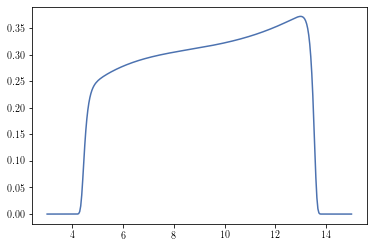

In [35]:
J = np.linspace(3, 15, 300)
JK = np.repeat(0.1, len(J))

comp = comp_fun.interp(J, JK)

plt.plot(J, comp)

# load clean data

ex. first file

In [36]:
index = 0
gaia = vaex.open(spectral_files[index])
gaia = gaia.filter("abs(z) > 50").filter("abs(z) < 200")
gaia = gaia.extract()
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_rv,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.008917061681364228,-0.048279332675252175,6.333000183105469,6.209000110626221,AAA,2448569690198755840,38.3818473815918,38.23798058974192,0.03215809911489487,-3.320105645310672,0.02077770233154297,15.648562219917743,0.03183779865503311,6.871397018432617,7.007111549377441,6.608101844787598,716.1038818359375,1091.4459228515625,1.0634098052978516,1.1764565706253052,-1.4844818198754623,-1.0982041189149518,63.59870147705078,62.819698333740234,63.837398529052734,0.00039999998989515007,0.0,0.001500000013038516,nan,nan,nan,A,--,9.158726692199707,gaia,0.3001042306423187,0.3001042306423187,1.0,7234.37060546875,gspphot,3.57373046875,3.30517578125,0.0,4.155799865722656,gspphot,0.003200054168701172,0.00820016860961914,0.0,nan,--,nan,nan,nan,-1.3895000219345093,gspphot,0.062399983406066895,0.07220005989074707,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.12400007247924805,2.305372388159757,63.90363446471675,-56.8992413574995,29.08867186279142,33.346648213326496,-19.00440249032187,0.030476525523901784,0.023174072685925768,-5.756494848419319,10.100807365547125,-0.013654361742468372,0.02252880254356858,-10.775183541282718,0.3001042306423187,0.2672824782536821,-0.9565182768560057,0.13714615438495595,-10.145663157583355,0.025368455825438258,-0.08219332519347466,0.13664939098167272,0.7641710959654313,2.3284855063378016
1,0.017169798689541858,0.2509584496833118,6.4629998207092285,6.3420000076293945,AAA,2768911028561373184,82.73104095458984,79.9700922599516,0.03658584877848625,-21.1945508376773,0.032072752714157104,12.846665601946027,0.030333148315548897,7.028295993804932,7.170999526977539,6.754446983337402,1664.38427734375,2524.64306640625,1.1126266717910767,1.177590012550354,-1.2921946921475476,-0.8189414254694577,77.58290100097656,77.27890014648438,77.88099670410156,0.005400000140070915,0.001500000013038516,0.016599999740719795,nan,nan,nan,F,--,-5.97739839553833,gaia,0.1642320305109024,0.1642320305109024,1.0,7105.09130859375,gspphot,6.92822265625,18.95068359375,0.0,4.05079984664917,gspphot,0.009699821472167969,0.015399932861328125,0.0,nan,--,nan,nan,nan,-0.6575000286102295,gspphot,0.07059997320175171,0.11430001258850098,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.12099981307983398,2.006951918738321,77.84121039536663,-56.85702896347089,53.16514171205383,71.35774881270771,-41.862827492401536,0.03628005921996555,0.03241825258248088,-15.446015990633782,26.3286785732944,-0.03838203644559833,0.06359133459864512,-6.18351786775425,0.1642320305109024,0.1227898521557249,-15.364661022653987,0.11562003621786511,-29.538927647913248,0.06891338313058806,-7.5315255538476835,0.11252909062350971,0.7517148478088003,2.315261130328931
2,0.003498652111962793,0.34181402481012196,8.41100025177002,8.293999671936035,AAA,2798239092482788992,19.890514373779297,-17.709723760118514,0.02364565059542656,-9.055286985848076,0.011061652563512325,5.503643654256842,0.020794959738850594,9.041516304016113,9.209527969360352,8.736372947692871,1302.2576904296875,1979.24853515625,0.9281964302062988,1.1787796020507812,-1.2762275735233326,-0.7278611504960014,180.91619873046875,180.06820678710938,181.627197265625,0.000699999975040555,9.999999747378752e-05,0.0020000000949949026,nan,nan,nan,F,F0,-7.059150218963623,gaia,0.3683013617992401,0.3683013617992401,1.0,6910.95

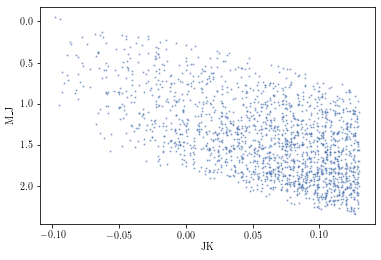

In [37]:
# plot the hr diagram of JK and M_J
gaia.viz.scatter('JK', 'M_J', s=1, alpha=0.5)
xmean = np.mean(gaia['JK'].to_numpy())
xstd = np.std(gaia['JK'].to_numpy())
xrange = xmean - 3*xstd, xmean + 3*xstd
ymean = np.mean(gaia['M_J'].to_numpy())
ystd = np.std(gaia['M_J'].to_numpy())
yrange = ymean - 3*ystd, ymean + 3*ystd
plt.gca().invert_yaxis()


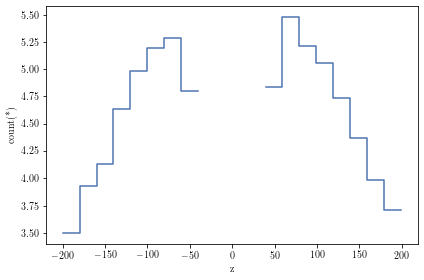

In [38]:
gaia.viz.histogram('z', shape=20, f="log")

In [153]:
# # use scipy kde to estimate the 2D kde estimate of the data
# # cut the middle plane of 30 degree
# gaia_filt = gaia.filter("abs(GLAT) > 30*3.14/180")
# gaia_filt = gaia_filt.extract()
# x = gaia_filt['JK'].to_numpy()
# y = gaia_filt['M_J'].to_numpy()
# k = gaussian_kde(np.vstack([x, y]))
# xi, yi = np.mgrid[-0.2:0.25:100j, -2:4:100j]
# zi = k(np.vstack([xi.flatten(), yi.flatten()]))

In [39]:
# use scipy kde to estimate the 2D kde estimate of the data
x = gaia['JK'].to_numpy()
y = gaia['M_J'].to_numpy()
k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[xrange[0]:xrange[1]:100j, yrange[0]:yrange[1]:100j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

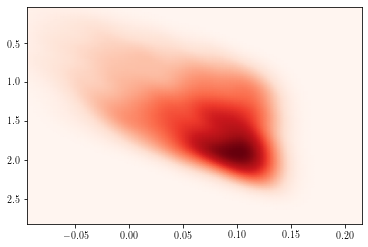

In [40]:
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.Reds)
# gaia_filt.viz.scatter('JK', 'M_J', s=1, alpha=0.1)
plt.gca().invert_yaxis()
plt.show()

In [41]:
Num = 10000
jks = np.random.uniform(xrange[0], xrange[1], Num)
mjs = np.random.uniform(yrange[0], yrange[1], Num)
Djk = xrange[1] - xrange[0]
Dmj = yrange[1] - yrange[0]
# do monte carlo integration
z = k(np.vstack([jks, mjs]))*Djk*Dmj/Num
z.sum()

1.0030389871194365

In [42]:
# ignore warning
import warnings
warnings.filterwarnings("ignore")

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:55<00:00,  1.79it/s]


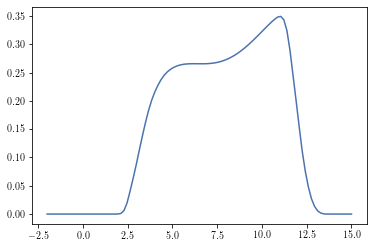

In [43]:
from tqdm import tqdm

DM = np.linspace(-2, 15, 100)

compDM = []
for dm in tqdm(DM):
    tot = k(np.vstack([jks, mjs]))*Djk*Dmj/Num*comp_fun.interp(dm + mjs, jks)
    compDM.append(tot.sum())
compDM = np.array(compDM)
plt.plot(DM, compDM)
plt.show()

In [44]:
df_comp = vaex.from_arrays(DM=DM, compDM=compDM)
df_comp

#,DM,compDM
0,-2.0,0.0
1,-1.8282828282828283,0.0
2,-1.6565656565656566,0.0
3,-1.4848484848484849,0.0
4,-1.3131313131313131,0.0
...,...,...
95,14.313131313131311,-4.9036496147060386e-203
96,14.484848484848484,0.0
97,14.656565656565657,0.0
98,14.828282828282827,0.0


In [45]:
index

0

In [46]:
df_comp.export(join(data_dir, spectral_files[index].split("/")[-1]), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :     0.05s =  0.0m =  0.0h
 

In [25]:
spectral_files

['/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(-0.10)_(0.13).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(0.13)_(0.19).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(0.19)_(0.24).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(0.24)_(0.27).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(0.27)_(0.31).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(0.31)_(0.33).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(0.33)_(0.36).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(0.36)_(0.38).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-metal/gaia_(0.38)_(0.40).hdf5']

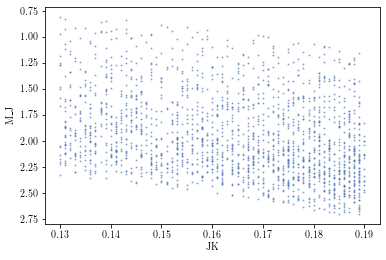

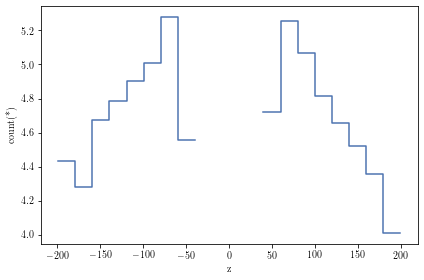

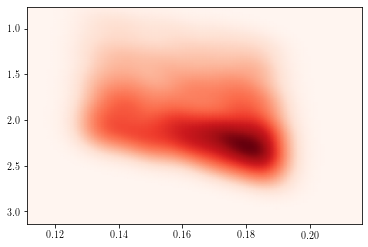

100%|██████████| 100/100 [00:57<00:00,  1.74it/s]


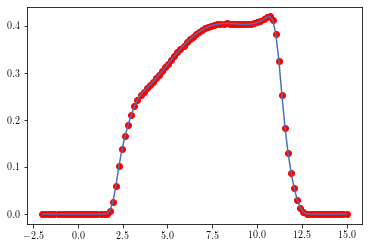

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

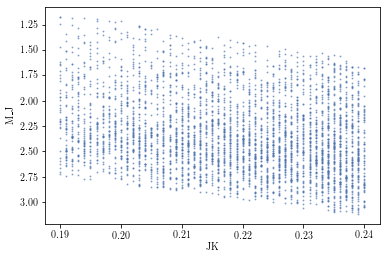

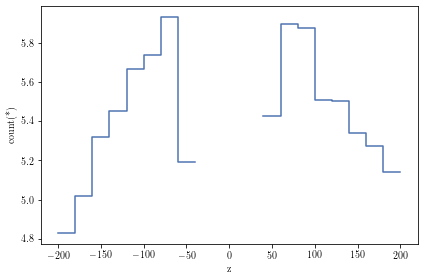

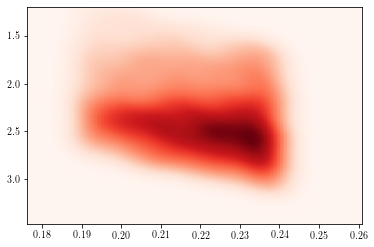

100%|██████████| 100/100 [01:40<00:00,  1.01s/it]


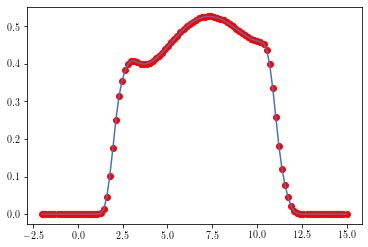

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

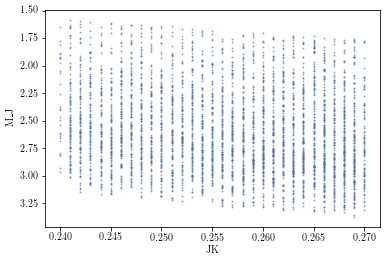

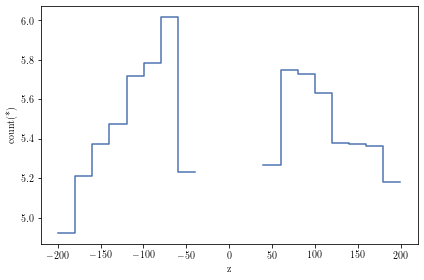

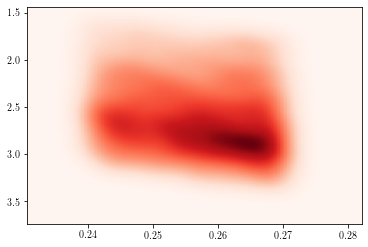

100%|██████████| 100/100 [01:41<00:00,  1.01s/it]


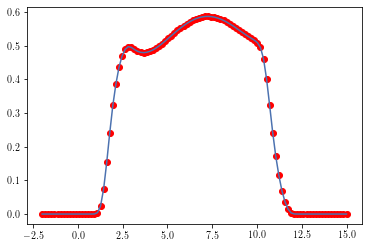

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

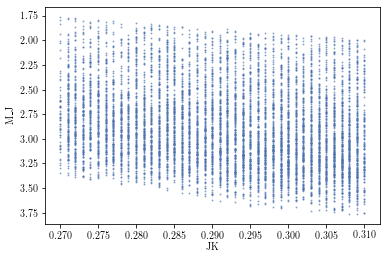

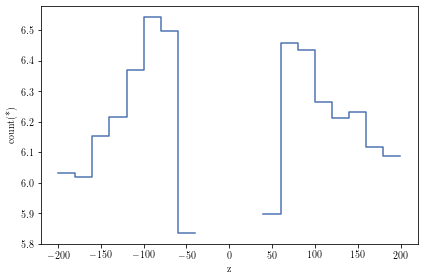

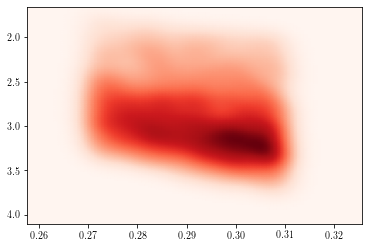

100%|██████████| 100/100 [03:19<00:00,  2.00s/it]


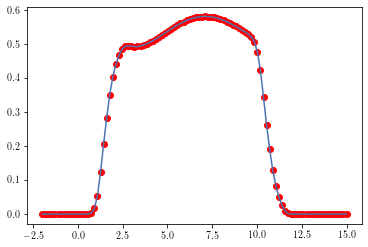

export(hdf5) [########################################] 100.00% elapsed time  :     0.04s =  0.0m =  0.0h
 

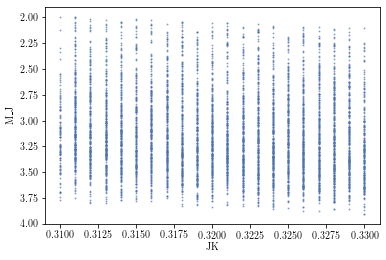

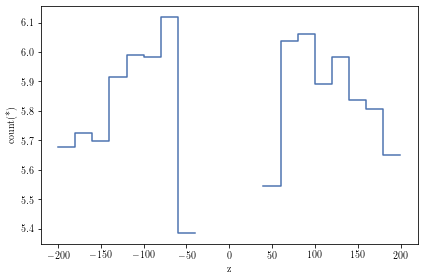

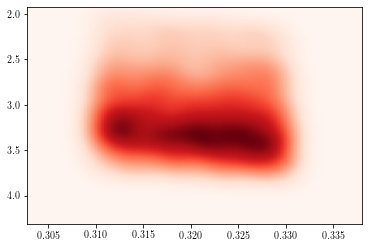

100%|██████████| 100/100 [02:19<00:00,  1.40s/it]


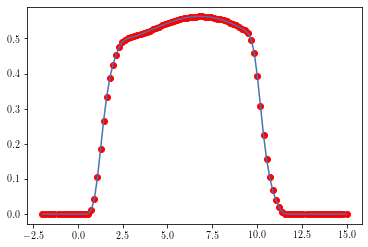

export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

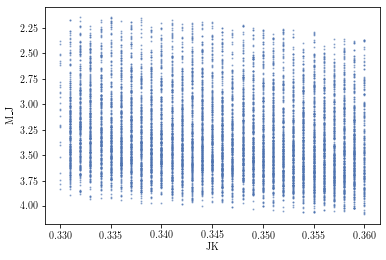

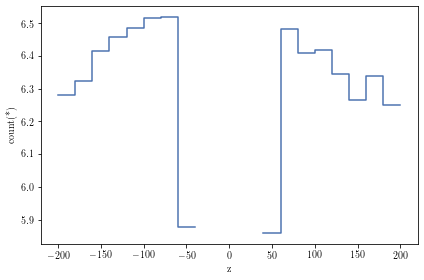

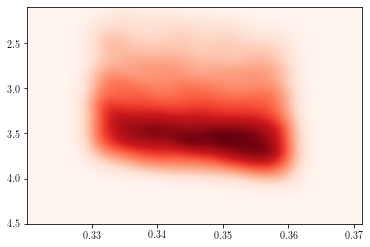

100%|██████████| 100/100 [03:48<00:00,  2.28s/it]


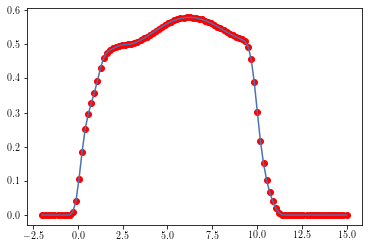

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

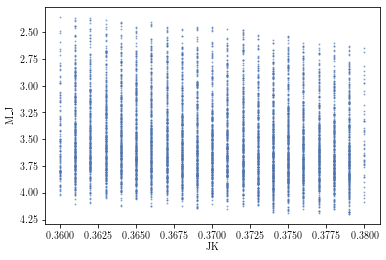

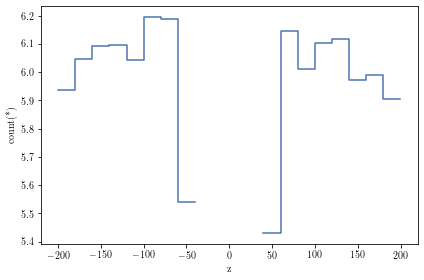

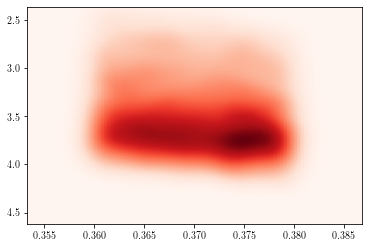

100%|██████████| 100/100 [02:43<00:00,  1.64s/it]


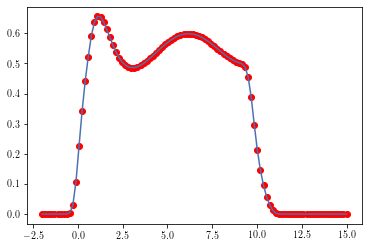

export(hdf5) [########################################] 100.00% elapsed time  :     0.04s =  0.0m =  0.0h
 

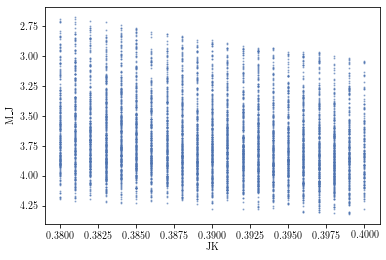

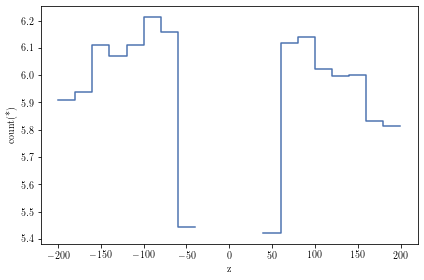

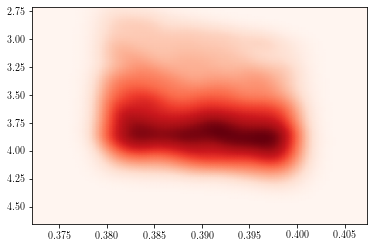

100%|██████████| 100/100 [02:39<00:00,  1.59s/it]


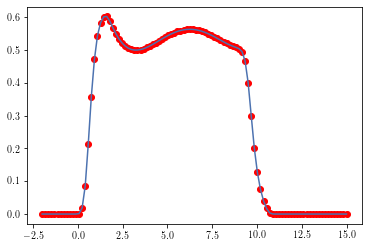

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

In [26]:
for file in spectral_files[1:]:
    gaia_raw = vaex.open(file)
    gaia = gaia_raw.filter("abs(z) > 50").filter("abs(z) < 200")
    gaia = gaia.extract()

    # plot the hr diagram of JK and M_J
    xmean = np.mean(gaia['JK'].to_numpy())
    xstd = np.std(gaia['JK'].to_numpy())
    xrange = xmean - 3*xstd, xmean + 3*xstd
    ymean = np.mean(gaia['M_J'].to_numpy())
    ystd = np.std(gaia['M_J'].to_numpy())
    yrange = ymean - 3*ystd, ymean + 3*ystd

    gaia.viz.scatter('JK', 'M_J', s=1, alpha=0.5)
    plt.gca().invert_yaxis()
    plt.show()

    gaia.viz.histogram('z', shape=20, f="log", show=True)

    # use scipy kde to estimate the 2D kde estimate of the data
    x = gaia['JK'].to_numpy()
    y = gaia['M_J'].to_numpy()
    k = gaussian_kde(np.vstack([x, y]))
    xi, yi = np.mgrid[xrange[0]:xrange[1]:100j, yrange[0]:yrange[1]:100j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))

    plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.Reds)
    # gaia_filt.viz.scatter('JK', 'M_J', s=1, alpha=0.1)
    plt.gca().invert_yaxis()
    plt.show()
    # calculate effective completeness, using monte carlo integration

    Num = 10000
    jks = np.random.uniform(xrange[0], xrange[1], Num)
    mjs = np.random.uniform(yrange[0], yrange[1], Num)
    Djk = xrange[1] - xrange[0]
    Dmj = yrange[1] - yrange[0]

    DM = np.linspace(-2, 15, 100)

    compDM = []
    for dm in tqdm(DM):
        tot = k(np.vstack([jks, mjs]))*Djk*Dmj/Num*comp_fun.interp(dm + mjs, jks)
        compDM.append(tot.sum())
    compDM = np.array(compDM)
    plt.plot(DM, compDM)
    plt.scatter(DM, compDM, c="r")
    plt.show()

    df_comp = vaex.from_arrays(DM=DM, compDM=compDM)
    df_comp.export(join(data_dir, file.split("/")[-1]), progress=True)